<a href="https://colab.research.google.com/github/j-hossain/Intro-to-Deep-Learning/blob/main/Day%201/LineAssumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Building a dataset

Text(0, 0.5, 'Sy')

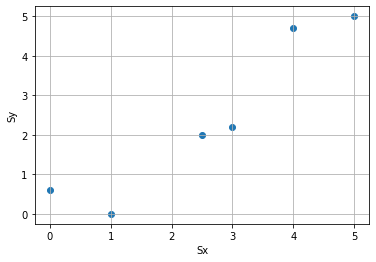

In [96]:
Sx = np.array([0, 1, 2.5, 3, 4, 5])
Sy = np.array([0.6, 0, 2, 2.2, 4.7, 5])

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

Lets assume a line 

$$y = mx + c$$

Where $m$ and $c$ are unknown, which we are trying to find.

We assume a random value for $m$ and $c$ ($m = 2$ and $c = 2$)

In [106]:
m1 = tf.Variable(2, dtype=tf.float32)
m2 = tf.Variable(2, dtype=tf.float32)
m3 = tf.Variable(2, dtype=tf.float32)
m4 = tf.Variable(2, dtype=tf.float32)
m5 = tf.Variable(2, dtype=tf.float32)
m6 = tf.Variable(2, dtype=tf.float32)
c = tf.Variable(0.5, dtype=tf.float32)

def line_fn(x):
    xx = np.sin(x)
    return ((m1*xx*xx*xx*xx + m2*xx*xx*xx + m3*xx*xx + m4*xx + m5)*xx + m6)*xx + c

Text(0, 0.5, 'Sy')

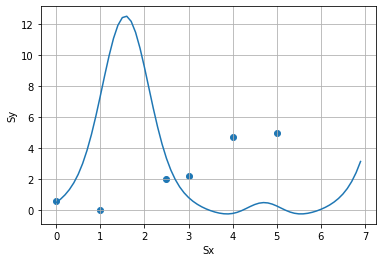

In [107]:
p = np.arange(0, 7, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

## Gradient descending algorithm:
$$m_{t} = m_{t-1} - lr \; \frac{\partial \;\; loss(l(x), y)}{\partial m} $$

$$loss(l(x), y) = (l(x) - y)^2$$

#### Here,

* $t$ = Time step
* $x$ = Input
* $y$ = Output
* $m$ = Updatable variable
* $loss(\cdot, \cdot)$ = Loss function
* $lr$ = Learning rate
* $l(\cdot)$ = Line function

#### Partial derivatives:

$\frac{\partial \;\; loss(l(x), y)}{\partial m} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)x$

$\frac{\partial \;\; loss(l(x), y)}{\partial c} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)$

In [108]:
# learning rate
lr = 0.08
total_steps = 800

for step in range(total_steps):
    print(f"Step {step+1:2}:")
    print("-"*30)

    with tf.GradientTape() as tape:
        # Printing value of the variables
        print(f"M1: {m1.numpy():.4f},M2: {m2.numpy():.4f},M3: {m3.numpy():.4f},M4: {m4.numpy():.4f}, C: {c.numpy():.4f}")
        
        # Stating what variables need to be partially differentiated and calibrated
        tape.watch([m1,m2,m3,m4,m5,m6, c])

        # Passing the points to the line function
        pred_y = line_fn(Sx)

        # Calculating the difference/loss of the output (pred_y) of the function
        # w.r.t. the known output (Sy)
        loss = (pred_y - Sy) * (pred_y - Sy)


    # Calculating the gradients w.r.t. the partially diff. parameters
    # and the generated output loss
    grads = tape.gradient(loss, [m1,m2,m3,m4,m5,m6, c])

    # Showing the output just for educational purposs
    print(f"M1_grad:, {grads[0].numpy():.2f},M2_grad:, {grads[1].numpy():.2f},M3_grad:, {grads[2].numpy():.2f},M4_grad:, {grads[3].numpy():.2f}, C_grad: {grads[6].numpy():.2f}")

    # Updating the gradients
    m1 = m1 - lr * grads[0]
    m2 = m2 - lr * grads[1]
    m3 = m3 - lr * grads[2]
    m4 = m4 - lr * grads[3]
    m5 = m5 - lr * grads[4]
    m6 = m6 - lr * grads[5]
    c = c - lr * grads[6]

    print()

Step  1:
------------------------------
M1: 2.0000,M2: 2.0000,M3: 2.0000,M4: 2.0000, C: 0.5000
M1_grad:, -3.84,M2_grad:, 16.49,M3_grad:, -3.48,M4_grad:, 21.89, C_grad: -4.80

Step  2:
------------------------------
M1: 2.3070,M2: 0.6809,M3: 2.2785,M4: 0.2487, C: 0.8836
M1_grad:, 4.70,M2_grad:, 2.40,M3_grad:, 5.82,M4_grad:, 4.26, C_grad: 6.76

Step  3:
------------------------------
M1: 1.9312,M2: 0.4893,M3: 1.8133,M4: -0.0919, C: 0.3424
M1_grad:, 1.73,M2_grad:, 1.99,M3_grad:, 1.80,M4_grad:, 3.08, C_grad: -4.68

Step  4:
------------------------------
M1: 1.7927,M2: 0.3305,M3: 1.6692,M4: -0.3385, C: 0.7171
M1_grad:, 2.83,M2_grad:, 0.32,M3_grad:, 3.09,M4_grad:, 1.00, C_grad: -1.13

Step  5:
------------------------------
M1: 1.5663,M2: 0.3050,M3: 1.4218,M4: -0.4188, C: 0.8075
M1_grad:, 2.00,M2_grad:, 0.49,M3_grad:, 2.06,M4_grad:, 1.06, C_grad: -2.64

Step  6:
------------------------------
M1: 1.4066,M2: 0.2657,M3: 1.2574,M4: -0.5037, C: 1.0187
M1_grad:, 1.98,M2_grad:, 0.24,M3_grad:, 2.0

## Lets check the final result

Text(0, 0.5, 'Sy')

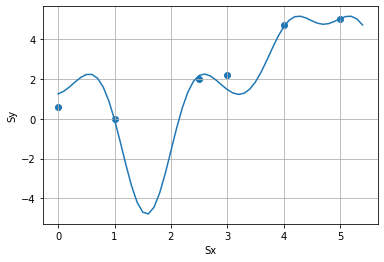

In [109]:
p = np.arange(0, 5.5, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')